## Project1

For your first project, you are asked to:

- Identify and load a network dataset that has some categorical information available for each node.

- For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.

- Compare your centrality measures across your categorical groups.

For example, using the dataset from a study of romantic relati  onships among high school students in Columbus, Ohio
[http://researchnews.osu.edu/archive/chains.htm], 

- You might want to determine if there are any differences in your calculated centrality measures between the two sexes.  

- You might use a t-test or another statistical measure to support your findings.

- You may work in a small group.  



This dataset is about sale record in which I selected country of origin of the item type and the cost.

In [29]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
#import networkx.algorithms.bipartite as bipartite
#pip install diGraph
#pip install ifsFractals --upgrade
#python3 -m pip install --user ifsFractals --upgrade




In [17]:
# Import data from github
# sale_data is a dataset containing information about sale records(different type of sale)
# We want to explore the connection the gender/loan_ID and loan amount and the property area
# country --> unit cost --> item type
# noun ..............verb............noun

url = 'https://raw.githubusercontent.com/asmozo24/Data622_HWK1/main/1000%20Sales%20Records.csv'
sale_data = pd.read_csv(url, index_col=0)
print(sale_data.head(8))


#Checking any missing value per column
sale_data.isna().any()

# Reduce size of the dataset
#df.iloc[:100]
sale_data = sale_data.iloc[:50, :]


                                 Country   Item Type Sales Channel  \
Region                                                               
Middle East and North Africa       Libya   Cosmetics       Offline   
North America                     Canada  Vegetables        Online   
Middle East and North Africa       Libya   Baby Food       Offline   
Asia                               Japan      Cereal       Offline   
Sub-Saharan Africa                  Chad      Fruits       Offline   
Europe                           Armenia      Cereal        Online   
Sub-Saharan Africa               Eritrea      Cereal        Online   
Europe                        Montenegro     Clothes       Offline   

                             Order Priority  Order Date   Order ID  \
Region                                                               
Middle East and North Africa              M  10/18/2014  686800706   
North America                             M   11/7/2011  185941302   
Middle East and Nor

In [18]:
# let's trim the df to only columns we want
df = sale_data[['Country','Unit Cost','Item Type']]
df

# Melt to edgelist



,Country,Unit Cost,Item Type
Region,,,
Middle East and North Africa,Libya,263.33,Cosmetics
North America,Canada,90.93,Vegetables
Middle East and North Africa,Libya,159.42,Baby Food
Asia,Japan,117.11,Cereal
Sub-Saharan Africa,Chad,6.92,Fruits
Europe,Armenia,117.11,Cereal
Sub-Saharan Africa,Eritrea,117.11,Cereal
Europe,Montenegro,35.84,Clothes
Central America and the Caribbean,Jamaica,90.93,Vegetables


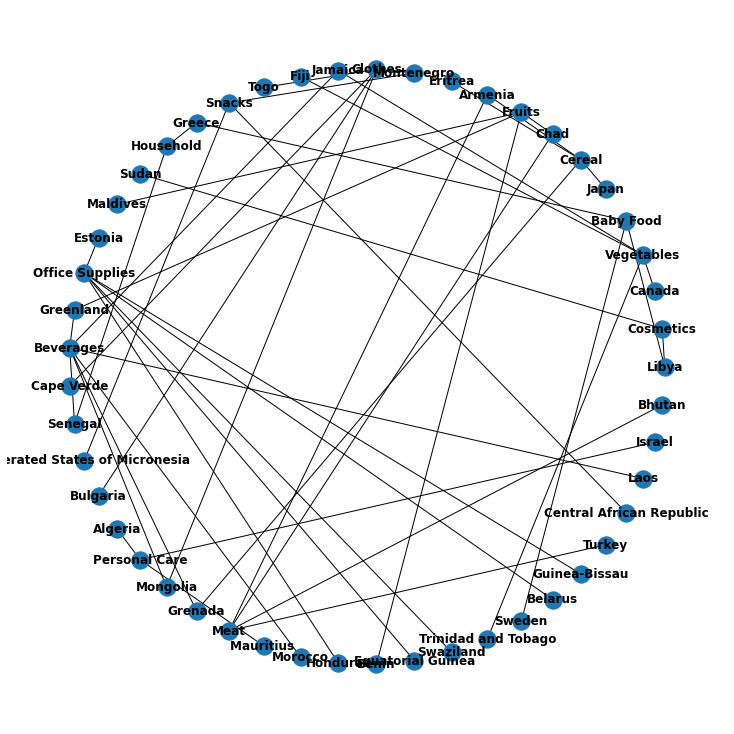

In [19]:
#Create a direccted graph...directed graph because there is no reciprocity between node ...link (a,b) does not guaranti link(b,a)

G = nx.from_pandas_edgelist(df,'Country','Item Type', 'Unit Cost', create_using = nx.Graph())

figure(figsize=(10, 10))
#nx.draw_shell(G, with_labels=True)
#nx.draw_networkx(G, with_label=True)

pos=nx.circular_layout(G)
#pos = nx.layout.fruchterman_reingold_layout(G, k=1, weight = 'Unit Cost', iterations = 1000, scale = 2)
nx.draw(G, pos = pos, with_labels=True, font_weight='bold')
#edge_weight = nx.get_edge_attributes(G,'Unit Cost')
#nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
#plt.show()

#G = nx.from_pandas_edgelist(df, source = 'Country', target = 'Unit Cost', edge_attr = 'Item Type',create_using = nx.Digraph())
#figure(figsize=(10, 10))
#nx.draw_networkx(G, with_labels= True, font_weight='bold')


In [38]:
#degree centrality, the sorting collection
degree=nx.degree(G, weight = 'weight')
print(sorted(degree,key=lambda degree: degree[1], reverse=True))


[('Beverages', 7), ('Office Supplies', 6), ('Clothes', 5), ('Vegetables', 4), ('Cereal', 4), ('Fruits', 4), ('Meat', 4), ('Baby Food', 3), ('Snacks', 3), ('Personal Care', 3), ('Libya', 2), ('Cosmetics', 2), ('Chad', 2), ('Armenia', 2), ('Montenegro', 2), ('Jamaica', 2), ('Greece', 2), ('Household', 2), ('Greenland', 2), ('Senegal', 2), ('Mongolia', 2), ('Grenada', 2), ('Canada', 1), ('Japan', 1), ('Eritrea', 1), ('Fiji', 1), ('Togo', 1), ('Sudan', 1), ('Maldives', 1), ('Estonia', 1), ('Cape Verde', 1), ('Federated States of Micronesia', 1), ('Bulgaria', 1), ('Algeria', 1), ('Mauritius ', 1), ('Morocco', 1), ('Honduras', 1), ('Benin', 1), ('Equatorial Guinea', 1), ('Swaziland', 1), ('Trinidad and Tobago', 1), ('Sweden', 1), ('Belarus', 1), ('Guinea-Bissau', 1), ('Turkey', 1), ('Central African Republic', 1), ('Laos', 1), ('Israel', 1), ('Bhutan', 1)]


In [41]:
#betweenness centrality
nx.betweenness_centrality(G, weight='weight')


{'Libya': 0.06205673758865248,
 'Cosmetics': 0.031914893617021274,
 'Canada': 0.0,
 'Vegetables': 0.09308510638297872,
 'Baby Food': 0.11968085106382978,
 'Japan': 0.0,
 'Cereal': 0.12278368794326242,
 'Chad': 0.050975177304964536,
 'Fruits': 0.12278368794326242,
 'Armenia': 0.050975177304964536,
 'Eritrea': 0.0,
 'Montenegro': 0.09042553191489361,
 'Clothes': 0.19946808510638298,
 'Jamaica': 0.11702127659574468,
 'Fiji': 0.0,
 'Togo': 0.0,
 'Snacks': 0.06294326241134751,
 'Greece': 0.14184397163120566,
 'Household': 0.16489361702127658,
 'Sudan': 0.0,
 'Maldives': 0.0,
 'Estonia': 0.0,
 'Office Supplies': 0.013297872340425532,
 'Greenland': 0.12898936170212766,
 'Beverages': 0.46675531914893614,
 'Cape Verde': 0.0,
 'Senegal': 0.18617021276595744,
 'Federated States of Micronesia': 0.0,
 'Bulgaria': 0.0,
 'Algeria': 0.0,
 'Personal Care': 0.0026595744680851063,
 'Mongolia': 0.20567375886524822,
 'Grenada': 0.12898936170212766,
 'Meat': 0.07402482269503546,
 'Mauritius ': 0.0,
 'Morocc

In [42]:
#closeness centrality
nx.closeness_centrality(G)

{'Libya': 0.11593834688346885,
 'Cosmetics': 0.10186011904761906,
 'Canada': 0.13711939102564102,
 'Vegetables': 0.1658187984496124,
 'Baby Food': 0.13327492211838007,
 'Japan': 0.14701460481099657,
 'Cereal': 0.18051160337552744,
 'Chad': 0.15844907407407408,
 'Fruits': 0.18051160337552744,
 'Armenia': 0.15844907407407408,
 'Eritrea': 0.14701460481099657,
 'Montenegro': 0.15333781362007168,
 'Clothes': 0.1828258547008547,
 'Jamaica': 0.20085093896713616,
 'Fiji': 0.13711939102564102,
 'Togo': 0.14854600694444445,
 'Snacks': 0.13082951070336393,
 'Greece': 0.15333781362007168,
 'Household': 0.17825520833333336,
 'Sudan': 0.09025580168776372,
 'Maldives': 0.14701460481099657,
 'Estonia': 0.06818181818181818,
 'Office Supplies': 0.125,
 'Greenland': 0.20971200980392157,
 'Beverages': 0.2501827485380117,
 'Cape Verde': 0.14854600694444445,
 'Senegal': 0.20971200980392157,
 'Federated States of Micronesia': 0.11228674540682415,
 'Bulgaria': 0.14854600694444445,
 'Algeria': 0.0375,
 'Person

In [43]:
#eigenvector centrality
#eigenvector = sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True)
#print(eigenvector[0:5])
nx.eigenvector_centrality(G)

{'Libya': 0.007962236510052192,
 'Cosmetics': 0.0031532700824512404,
 'Canada': 0.04980253873298206,
 'Vegetables': 0.1430888379172845,
 'Baby Food': 0.019723227778138,
 'Japan': 0.05598814945259314,
 'Cereal': 0.1608606569320134,
 'Chad': 0.08230586911153394,
 'Fruits': 0.1608606569320134,
 'Armenia': 0.08230586911153394,
 'Eritrea': 0.05598814945259314,
 'Montenegro': 0.0823051829150236,
 'Clothes': 0.19866642825072817,
 'Jamaica': 0.2617042240711226,
 'Fiji': 0.04980253873298206,
 'Togo': 0.06914652406780501,
 'Snacks': 0.03780643268283444,
 'Greece': 0.04184030694099287,
 'Household': 0.10048912171468323,
 'Sudan': 0.0010975047182629055,
 'Maldives': 0.05598814945259314,
 'Estonia': 4.470000167683113e-05,
 'Office Supplies': 0.00010949219560978869,
 'Greenland': 0.2678898347907337,
 'Beverages': 0.608819460308124,
 'Cape Verde': 0.06914652406780501,
 'Senegal': 0.24687726048734412,
 'Federated States of Micronesia': 0.013158658847218592,
 'Bulgaria': 0.06914652406780501,
 'Algeria'

In [ ]:
#bonacich centrality


In [22]:
#page rank
nx.pagerank_numpy(G, weight='weight')

C:\Users\owner\AppData\Local\Temp\ipykernel_15672\187042690.py:2: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  nx.pagerank_numpy(G, weight='weight')
C:\Windows\System32\opencv\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


{'Libya': 0.02172926087956214,
 'Cosmetics': 0.023323994019469812,
 'Canada': 0.011899994390630341,
 'Vegetables': 0.04159421129804436,
 'Baby Food': 0.03090119622879398,
 'Japan': 0.011178733453432703,
 'Cereal': 0.038200042181820236,
 'Chad': 0.01942001319378022,
 'Fruits': 0.038200042181820305,
 'Armenia': 0.019420013193780217,
 'Eritrea': 0.011178733453432704,
 'Montenegro': 0.02066176903123135,
 'Clothes': 0.04872053147462881,
 'Jamaica': 0.019265884969743716,
 'Fiji': 0.011899994390630384,
 'Togo': 0.011343714840482818,
 'Snacks': 0.032887250084994796,
 'Greece': 0.020143428134328747,
 'Household': 0.019592622854214578,
 'Sudan': 0.012973921948070514,
 'Maldives': 0.011178733453432704,
 'Estonia': 0.01259422687994118,
 'Office Supplies': 0.06729178157749599,
 'Greenland': 0.018544624032546086,
 'Beverages': 0.06066027535740437,
 'Cape Verde': 0.011343714840482801,
 'Senegal': 0.01875397978195052,
 'Federated States of Micronesia': 0.01237927868054446,
 'Bulgaria': 0.0113437148404

In [ ]:
#distance weighted reach
